# Predicting the Likelihood of Heart Disease within a Patient

#### Group 14: Allie Fehr, Anh Huynh, Megan Ong, Preston San

## 1. Introduction
Heart disease is a medical condition that affects the heart and blood vessels, preventing proper blood circulation. We plan to address the question: “Is there a correlation between the variables in the dataset outcome of whether individuals have heart disease?” The dataset we selected contains the recorded health variables of various patients in Cleveland that show the presence and type of heart disease. 


## 2. Preliminary Exploratory Data Analysis

In [1]:
#loading all packages
library(tidymodels)
library(tidyverse)
library(repr)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.7
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr:

In [2]:
#read csv file from UCI
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data_raw <- read_csv(url, col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Cleaning and wrangling data
# Added meaningful column names. 
# We changed the orignal attribute name "num" to "Heart_Disease" because "num" had little meaning

set.seed(1)

heart_data <- rename(heart_data_raw,
                     Age = X1,
                     Sex = X2,
                     Chest_Pain_Type = X3,
                     Resting_Blood_Pressure = X4,
                     Total_Cholesterol = X5,
                     Fasting_Blood_Sugar = X6,
                     Resting_Electrocardiographic_Results = X7,
                     Maximum_Heart_Rate = X8,
                     Exercise_Induced_Angina = X9,
                     ST_Depression = X10,
                     Slope_Peak_excercise = X11,
                     Major_Vessels = X12,
                     Thalassemia = X13,
                     Heart_Disease = X14)

heart_data <- heart_data |> mutate(Heart_Disease = as_factor(Heart_Disease))
head(heart_data)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Total_Cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope_Peak_excercise,Major_Vessels,Thalassemia,Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [4]:
# We only want to know if each patient is tested positive or negative for heart disease
# This means we only need the numbers 0 (negative) and 1 (postive) and want to remove other numbers
# We reassigned the numbers 2, 3, and 4 to 1 because numbers that are greater 1 also mean that the patient has heart disease

heart_data_viz <- heart_data

head(heart_data_viz)

heart_data_viz$Heart_Disease[heart_data_viz$Heart_Disease== "4"]<- "1"
heart_data_viz$Heart_Disease[heart_data_viz$Heart_Disease== "3"]<- "1"
heart_data_viz$Heart_Disease[heart_data_viz$Heart_Disease== "2"]<- "1"



Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Total_Cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope_Peak_excercise,Major_Vessels,Thalassemia,Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
# summarizing the data in one table

summary_table <- heart_data |> 
                   group_by(Heart_Disease) |>
                   summarize(number_patients = n(),
                           mean_age = mean(Age, na.rm = TRUE),   
                           median_age = median(Age, na.rm = TRUE),
                           mean_resting_blood_pressure = mean(Resting_Blood_Pressure, na.rm = TRUE),
                           median_resting_blood_pressure = median(Resting_Blood_Pressure, na.rm = TRUE),  
                           mean_max_heart_rate = mean(Maximum_Heart_Rate, na.rm = TRUE),
                           median_max_heart_rate = median(Maximum_Heart_Rate, na.rm = TRUE),
                           number_rows_missing_data = sum(heart_data=="?"))  


summary_table


Heart_Disease,number_patients,mean_age,median_age,mean_resting_blood_pressure,median_resting_blood_pressure,mean_max_heart_rate,median_max_heart_rate,number_rows_missing_data
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,164,52.58537,52,129.2500,130,158.3780,161,6
1,55,55.38182,57,133.2545,130,145.9273,150,6
2,36,58.02778,59,134.1944,133,135.5833,142,6
3,35,56.00000,56,135.4571,130,132.0571,130,6
4,13,59.69231,60,138.7692,145,140.6154,132,6


In [21]:
# separating data into training and testing data
set.seed(200)
heart_cut <- heart_data_viz |> select(Age, Sex, Heart_Disease, Maximum_Heart_Rate)
heart_cut <- na.omit(heart_cut)
heart_split <- initial_split(heart_cut, prop = 0.75, strata = Heart_Disease) 
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)
head(heart_train)

Age,Sex,Heart_Disease,Maximum_Heart_Rate
<dbl>,<dbl>,<fct>,<dbl>
63,1,0,150
37,1,0,187
41,0,0,172
56,1,0,178
57,0,0,163
56,0,0,153


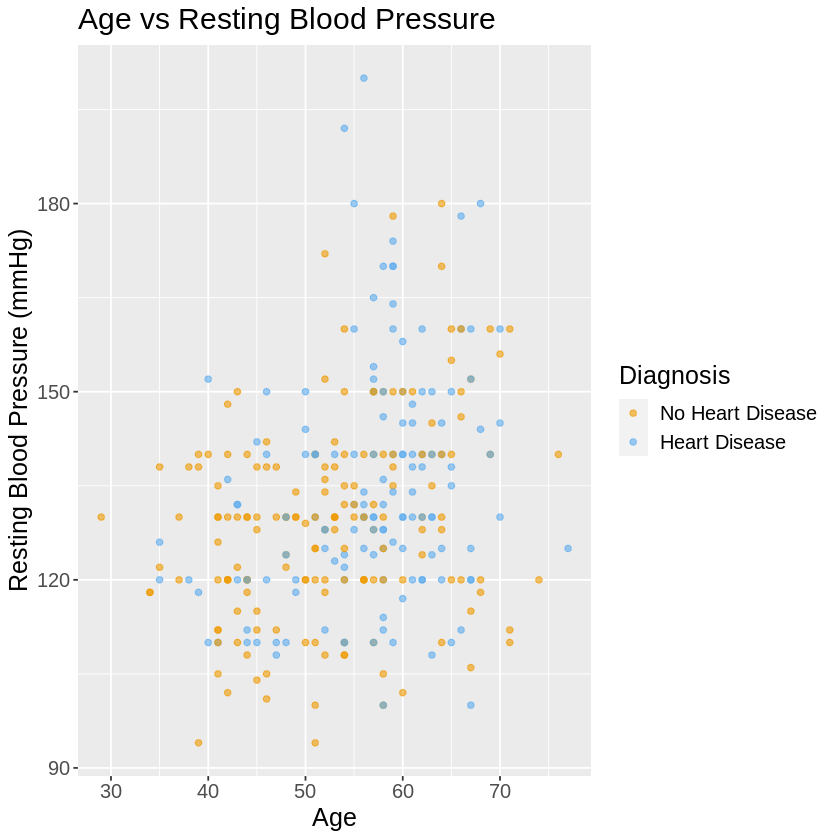

In [7]:
age_vs_resting_blood_pressure <- heart_data_viz |>
    ggplot(aes(x = Age, y = Resting_Blood_Pressure, colour = Heart_Disease)) +
    geom_point(alpha = 0.6) +
    xlab("Age") +
    ylab("Resting Blood Pressure (mmHg)") +
    ggtitle("Age vs Resting Blood Pressure") +
    labs(color = "Diagnosis") +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("orange2", "steelblue2"))+
    theme(text = element_text(size = 15))

age_vs_resting_blood_pressure

Resting blood pressure is a numerical variable that is able to help determine the likelihood of the presence of heart disease.


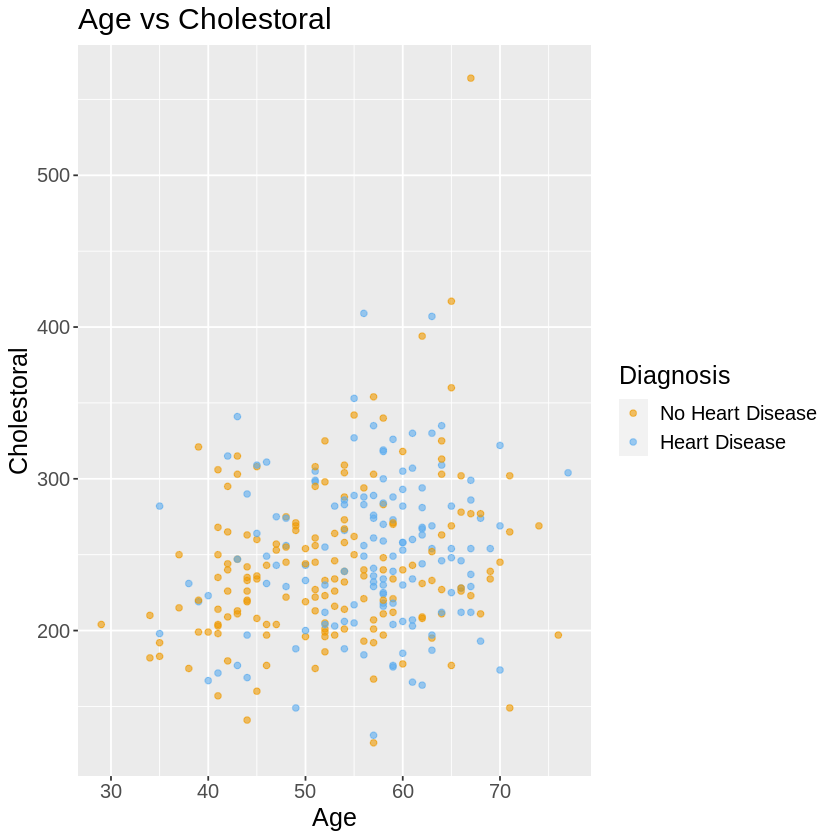

In [8]:
age_vs_cholesterol <- heart_data_viz |>
    ggplot(aes(x = Age, y = Total_Cholesterol, colour = Heart_Disease)) +
    geom_point(alpha = 0.6) +
    xlab("Age") +
    ylab("Cholestoral") +
    ggtitle("Age vs Cholestoral") +
    labs(color = "Diagnosis") +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 15))
age_vs_cholesterol

Cholesterol levels are a numerical value. Sources have shown that high levels of cholesterol have been known to be associated with the presence of heart disease.

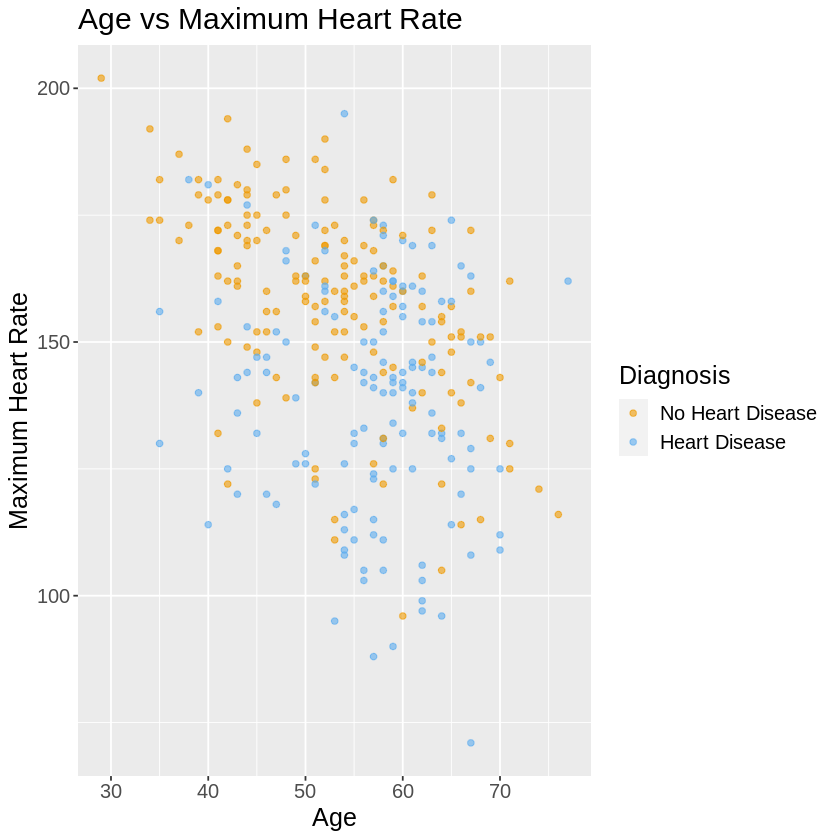

In [9]:
age_vs_HeartRate <- heart_data_viz |>
    ggplot(aes(x = Age, y = Maximum_Heart_Rate, colour = Heart_Disease)) +
    geom_point(alpha = 0.6) +
    xlab("Age") +
    ylab("Maximum Heart Rate") +
    ggtitle("Age vs Maximum Heart Rate") +
    labs(color = "Diagnosis") +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 15))
age_vs_HeartRate


Maximum heart rate is a numerical variable and It is believed that maximum heart rate can be indicative of the presence of heart disease.

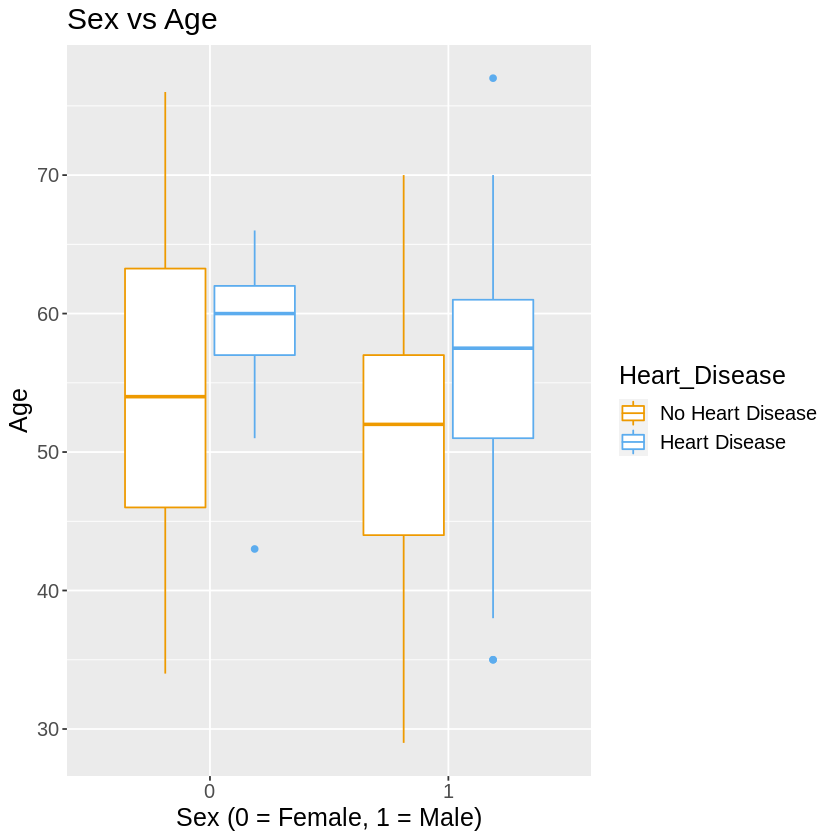

In [10]:
age_vs_sex <- ggplot(heart_data_viz, aes(x = as_factor(Sex), y = Age, color = Heart_Disease)) +
  geom_boxplot() +
  labs(x = "Sex (0 = Female, 1 = Male)", y = "Age",  fill = "Type") +
   ggtitle("Sex vs Age") +
  scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("orange2", "steelblue2")) +
    theme(text = element_text(size = 15))

age_vs_sex



Despite it being a categorical variable, this variable allows us to see the difference between the two sexes. 

#### Variables included and why: 
* Age: Increase in age increases the chance of heart disease.
* Sex: Despite it being a categorical variable, this variable allows us to see the difference between the two genders. 
* Resting_Blood_Pressure: It is evident in the visualization above
* Total_Cholesterol: Sources have shown that high levels of cholesterol have been known to be associated with the presence of heart disease.
* Maximum_Heart_Rate Maximum heart rate is a numerical variable and it is believed that a lower maximum heart rate is indicative of the presence of heart disease.

#### Variables not included and why:
* Exercise_Induced_Angina: Categorical variable
* ST_Depression: Multiple conditions are associated with ST depression so it is unclear whether or not it may lead to heart disease. This variable quantifies the amount of change in electrical activity in the heart
* Slope_Peak_excercise: Denotes the peak heart rate during exercise relative to the age-predicted max heart rate. In the dataset, it is a categorical variable, which is unclear and not really helpful for prediction.
* Major_Vessels: Categorical variable 
* Thalassemia: Thalassemia is a genetic disease and is categorical, but only severe thalassemia can be of use for prediction
* Chest_Pain_Type: Categorical variable
* Fasting_Blood_Sugar: Measures quantity of blood sugar, however on the dataset it is a boolean value with unclear meaning
* Resting_Electrocardiographic_Results: Categorical variable

We will not include any categorical values as they are difficult to use in our model.

## 3. Methods
We will be using the K-nearest neighbour (KNN) classification model to predict whether a person has heart disease. We will be using age, sex, resting blood pressure, total cholesterol, and maximum heart rate as predictors. KNN classification would allow us to use other variables to predict the categorical class of a new data point.

We have split the dataset into training and testing sets. We will train our classifier on the training set and then evaluate its performance on the testing set. We will specifically set neighbours to tune() and set_mode() to “classification” in the specification. Afterwards, we will perform a 5-fold cross-validation and create a visualization plotting the accuracy versus K to evaluate the performance of the classifier. This will show the accuracy for each value of K and allow us to determine the K value that will give us the best accuracy for our classifier. 


## 4. Expected Outcomes and Significance
* We expect to find a correlation between age, sex, resting blood pressure, cholesterol, and heart rate which will help us determine the likelihood of a heart disease diagnosis within a patient.
* These findings would help healthcare professionals identify individuals who have a high risk for developing heart disease and be able to develop interventions early enough to delay or prevent heart disease from occurring. 
* These findings would also likely raise questions such as how much certain lifestyle habits can influence a person’s likelihood of developing heart disease. 


In [22]:
set.seed(200)

heart_initial_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")


In [23]:
set.seed(200)
heart_recipe <- recipe(Heart_Disease ~ Age + Sex + Maximum_Heart_Rate, data = heart_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [25]:
set.seed(200)
heart_vfold <- vfold_cv(heart_train, v = 5, strata = Heart_Disease)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))


In [26]:
heart_results <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_initial_spec) |>
       tune_grid(resamples = heart_vfold, grid = k_vals) |>
       collect_metrics()

! Fold1: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold2: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold5: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.



In [27]:
set.seed(200)
accuracies <- heart_results |>
  filter(.metric == "accuracy") |> 
    arrange(desc(mean)) |>
    slice(1)

accuracies

final_k <- accuracies |> select(n)

final_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,multiclass,0.757141,5,0.01764098,Preprocessor1_Model04


n
<int>
5


In [28]:
set.seed(200)
heart_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = final_k) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_final_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_final_spec) |>
       fit(data = heart_train)

heart_testing <- predict(heart_final_fit, heart_test) |> bind_cols(heart_test)

predictions <- heart_testing |> conf_mat(truth = Heart_Disease, estimate = .pred_class)

predictions

prediction_accuracy <- heart_testing |> metrics(truth = Heart_Disease, estimate = .pred_class)

prediction_accuracy

          Truth
Prediction  0  1  2  3  4
         0 26 10  0  0  0
         1 15 25  0  0  0
         2  0  0  0  0  0
         3  0  0  0  0  0
         4  0  0  0  0  0

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6710526
kap,multiclass,0.3448276
